In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install seaborn

In [ ]:
!pip install matplotlib

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [9]:
df = pd.read_csv("/Users/eklavyabanwala/Downloads/Hospital_dataset.csv")

# Part 1

In [10]:
df.describe()

,Facility ID,Year,Infections Observed,Infections Predicted,Denominator,Indicator Value,Indicator Lower Confidence Limit,Indicator Upper Confidence Limit
count,24476.000000,24476.000000,23213.000000,15263.000000,2.129200e+04,23213.000000,15263.000000,15263.000000
mean,911.560672,2014.601242,19.452634,7.977099,3.814053e+04,1.853134,0.951811,8.580068
std,676.948341,3.208366,224.905210,21.806285,4.237851e+05,3.158958,2.168778,14.182610
min,0.000000,2008.000000,0.000000,0.030000,2.000000e+01,0.000000,0.000000,0.280000
25%,484.000000,2012.000000,0.000000,0.870000,3.130000e+02,0.000000,0.000000,2.940000
50%,873.000000,2015.000000,2.000000,2.120000,2.443500e+03,0.730000,0.130000,5.530000
75%,1305.000000,2017.000000,8.000000,5.190000,1.856800e+04,2.170000,0.770000,10.710000
max,9250.000000,2019.000000,10388.000000,335.900000,1.313847e+07,85.350000,31.670000,1161.730000


-->  general info about the dataset

In [11]:
df.shape

(24476, 13)

-->  dataset has 24476 rows and 13 columns which can be used as features

In [12]:
df.columns

Index(['Facility ID', 'Hospital Name', 'Indicator Name', 'Year',
       'Infections Observed', 'Infections Predicted', 'Denominator',
       'Indicator Value', 'Indicator Lower Confidence Limit',
       'Indicator Upper Confidence Limit', 'Indicator Units',
       'Comparison Results', 'New Georeferenced Column'],
      dtype='object')

-->  all features name in the dataset

In [13]:
print(df['New Georeferenced Column'].isnull().sum())

270


-->  number of hospitals in which location is not given

In [14]:
df = df.dropna(subset=['New Georeferenced Column'])
df = df.dropna(subset=['Indicator Units'])
df = df.dropna(subset=['Comparison Results'])

-->  dropping hospitals with missing location and missing values in Indicator Units and Comparison results

In [15]:
df.shape

(22183, 13)

In [16]:
columns_to_remove = ['Infections Observed', 'Infections Predicted', 'Denominator',
       'Indicator Value', 'Indicator Lower Confidence Limit',
       'Indicator Upper Confidence Limit'] 
df[columns_to_remove] = df[columns_to_remove].fillna(df[columns_to_remove].median())

-->  fill missing values with median of each column 

In [17]:
for column in df.columns:
    missing_values_count = df[column].isnull().sum()
    if missing_values_count > 0:
        print(f"{column} --> {missing_values_count} missing values")
    else:
        print(f"no missing values in {column}")

no missing values in Facility ID
no missing values in Hospital Name
no missing values in Indicator Name
no missing values in Year
no missing values in Infections Observed
no missing values in Infections Predicted
no missing values in Denominator
no missing values in Indicator Value
no missing values in Indicator Lower Confidence Limit
no missing values in Indicator Upper Confidence Limit
no missing values in Indicator Units
no missing values in Comparison Results
no missing values in New Georeferenced Column


--> checked if any missing values remaining

In [18]:
to_lower_case = ['Hospital Name', 'Indicator Name', 'Indicator Units', 'Comparison Results']

for i in to_lower_case:
    df[i] = df[i].str.lower()

-->  lower case all the string values

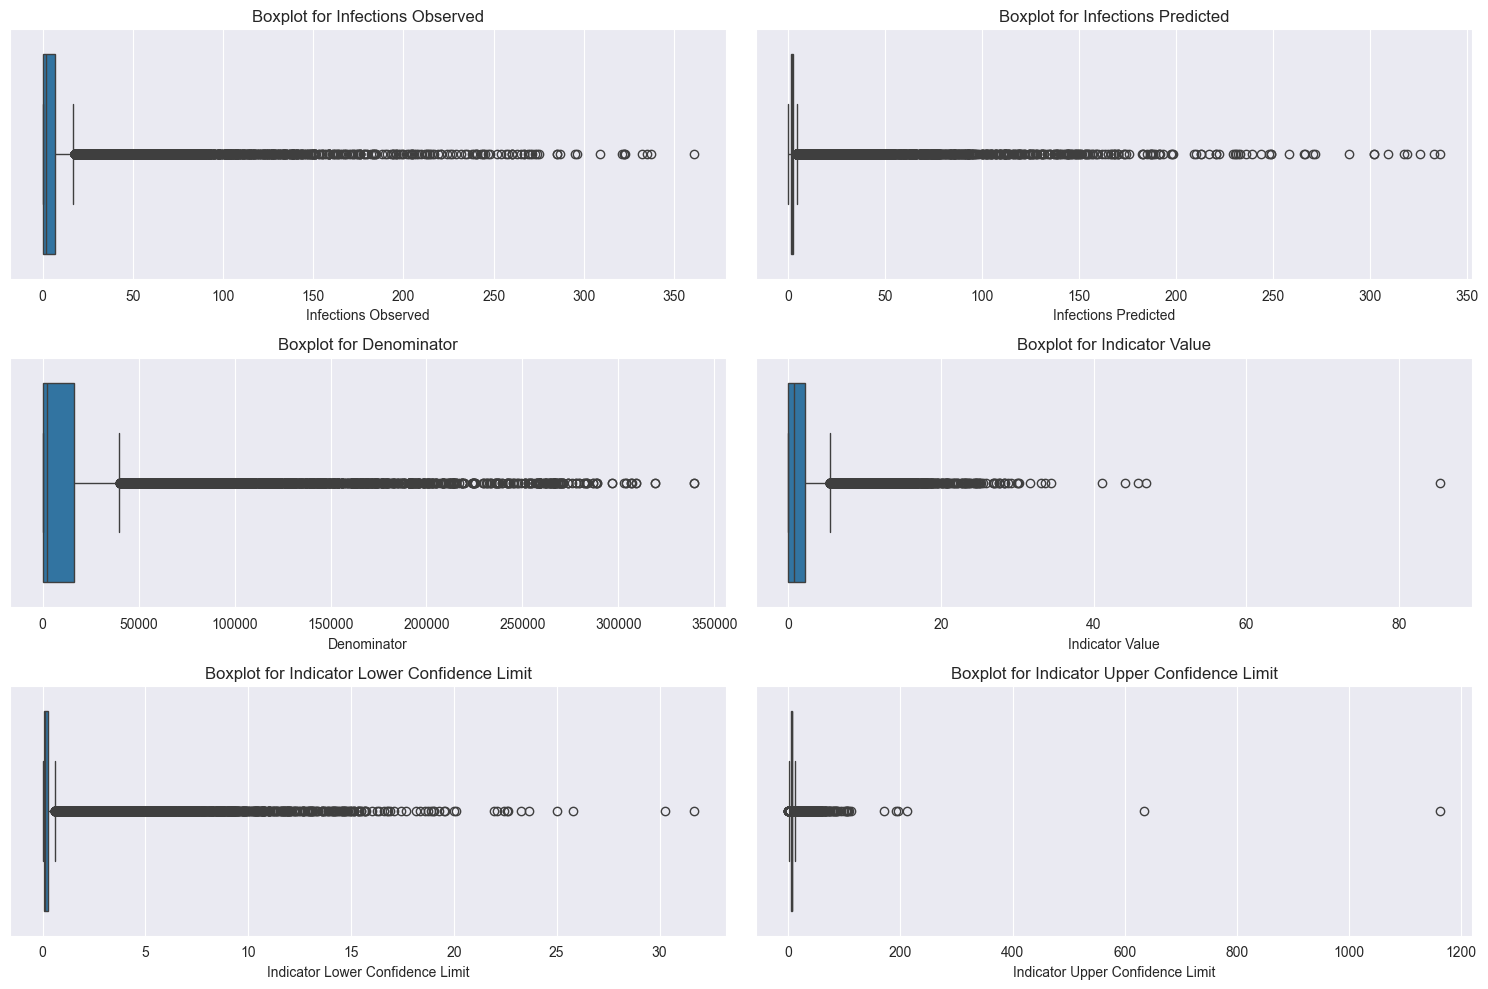

In [19]:
features = ['Infections Observed', 'Infections Predicted', 'Denominator', 'Indicator Value', 'Indicator Lower Confidence Limit', 'Indicator Upper Confidence Limit']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

--> box plots showing outliers in the dataset 

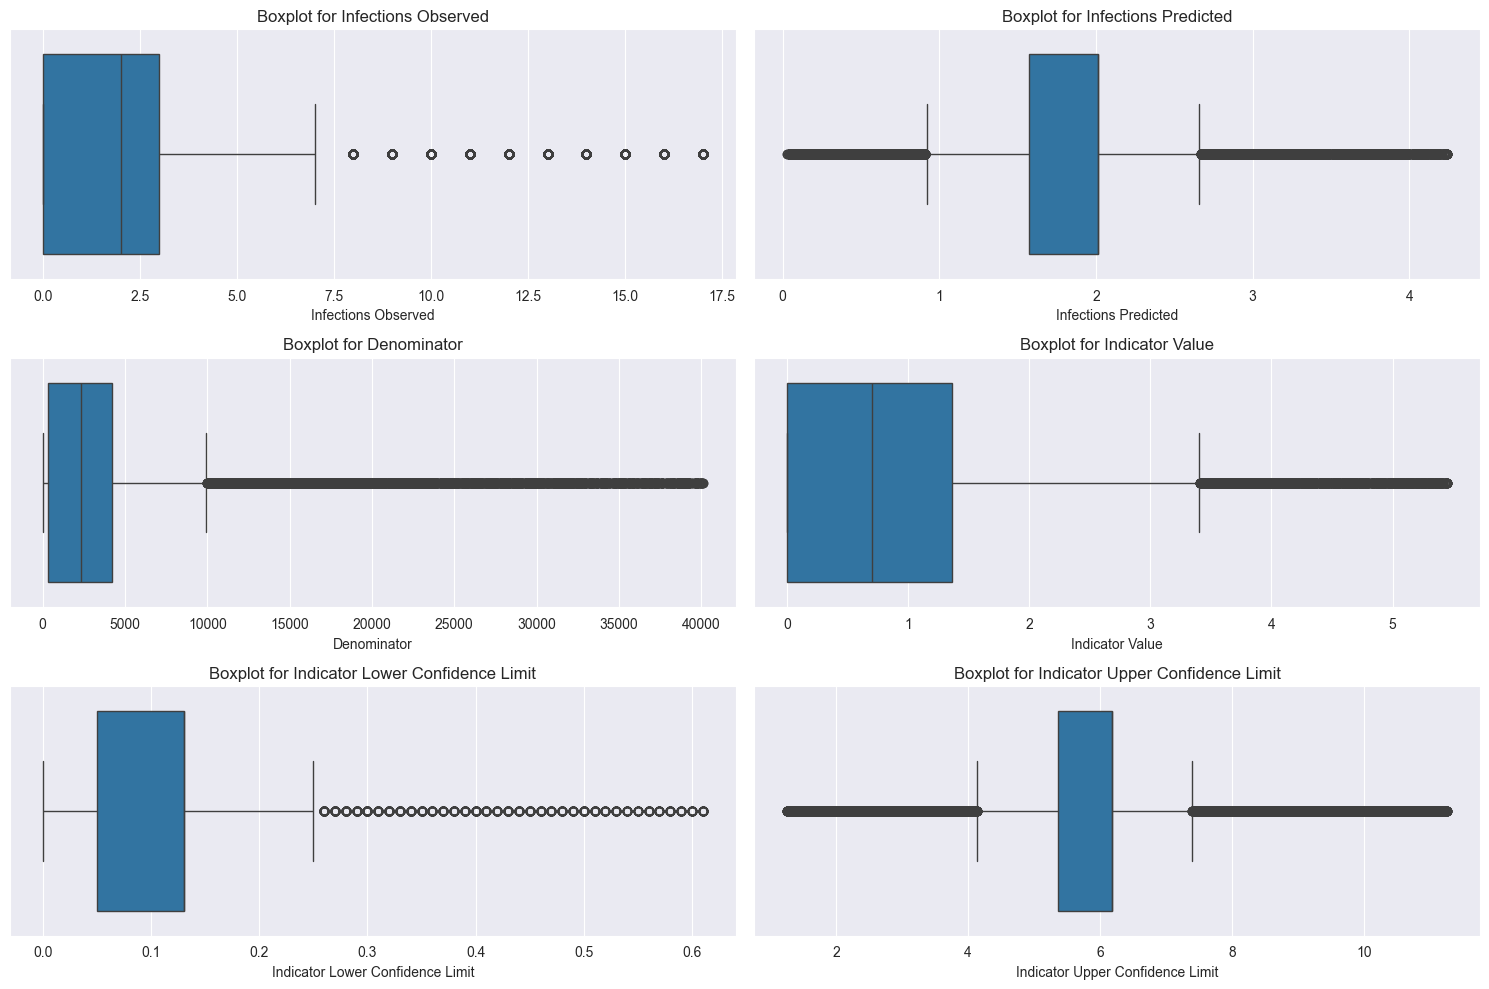

In [20]:
column_outliers = ['Infections Observed', 'Infections Predicted', 'Denominator', 'Indicator Value', 'Indicator Lower Confidence Limit', 'Indicator Upper Confidence Limit']

for column in column_outliers:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    df[column] = df[column].apply(lambda x: df[column].median() if x < lower_limit or x > upper_limit else x)
    
    
    
plt.figure(figsize=(15, 10))

for i, column in enumerate(column_outliers, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()


--> Removing Outliers

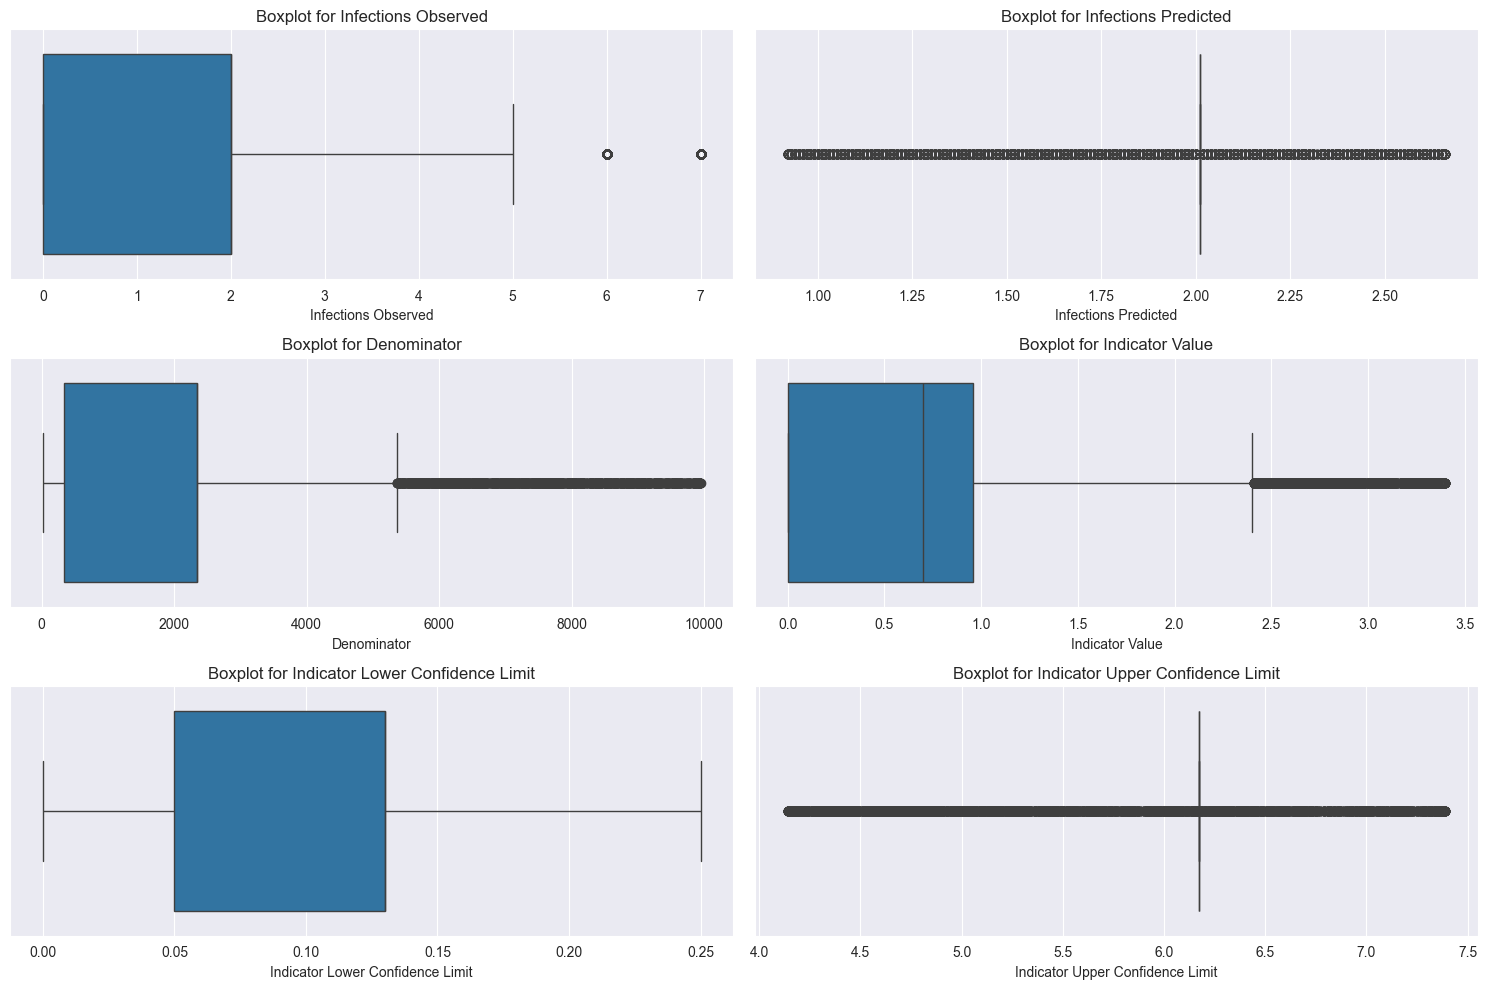

In [21]:
column_outliers = ['Infections Observed', 'Infections Predicted', 'Denominator', 'Indicator Value', 'Indicator Lower Confidence Limit', 'Indicator Upper Confidence Limit']

for column in column_outliers:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    df[column] = df[column].apply(lambda x: df[column].median() if x < lower_limit or x > upper_limit else x)
    
    
    
plt.figure(figsize=(15, 10))

for i, column in enumerate(column_outliers, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
print(df['Indicator Units'].unique())

['# ssi per 100 procedures, risk-adjusted' '# clabsi per 1000 line days'
 '# hospital onset cases per 10,000 patient days, risk-adjusted'
 '# possibly-my-hospital cases per 10,000 patient days, not risk-adjusted'
 '# admission prevalent cre bsis per 1,000 admissions'
 '# community onset not-my-hospital cases per 100 admissions, not risk-adjusted'
 '# hospital onset blood stream cre infections per 10,000 patient days'
 '# hospital onset cre infections per 10,000 patient days'
 '# admission prevalent cre infections per 1,000 admissions'
 '# hospital onset cases per 10,000 patient days at risk, risk-adjusted']


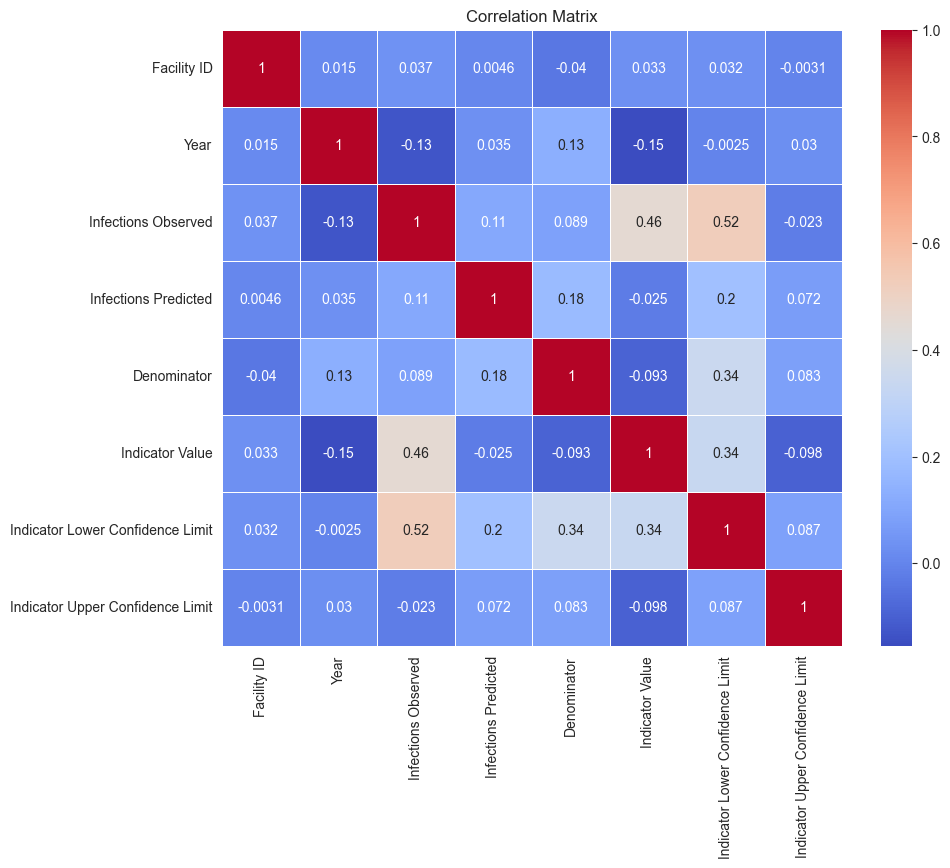

In [24]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

--> we can now remove unwanted uncorrelated features according to our target variable

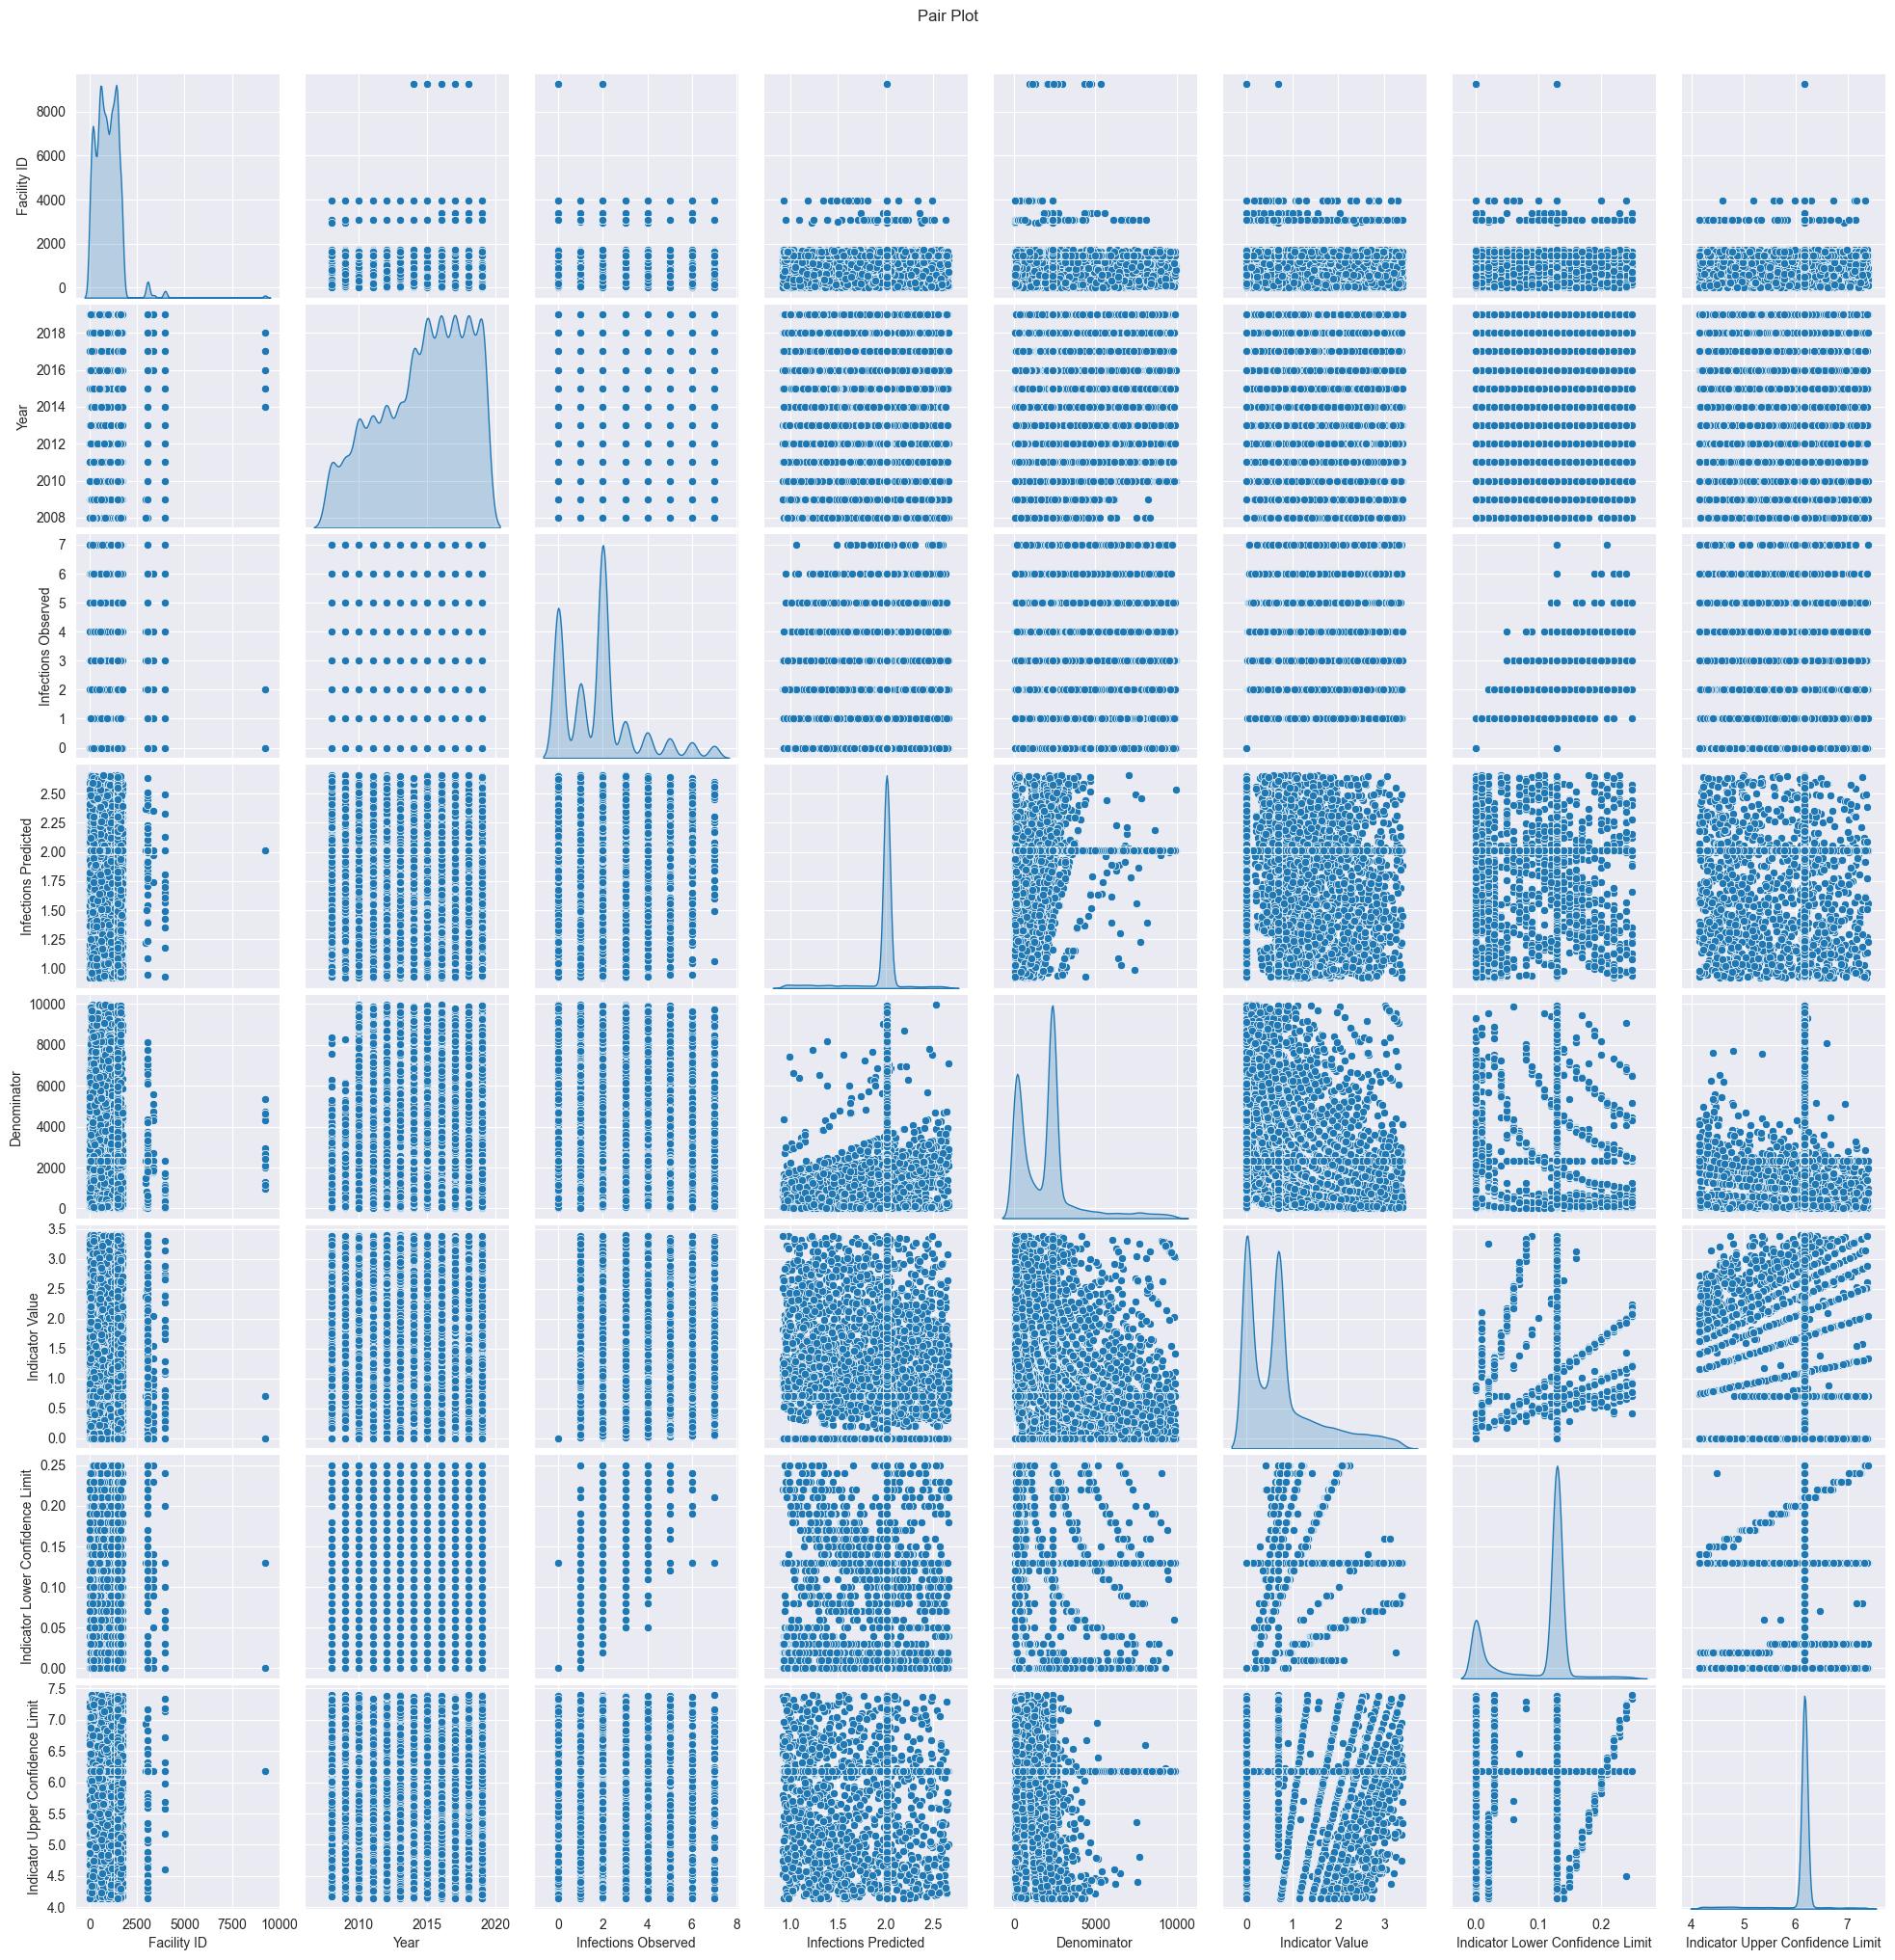

In [25]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

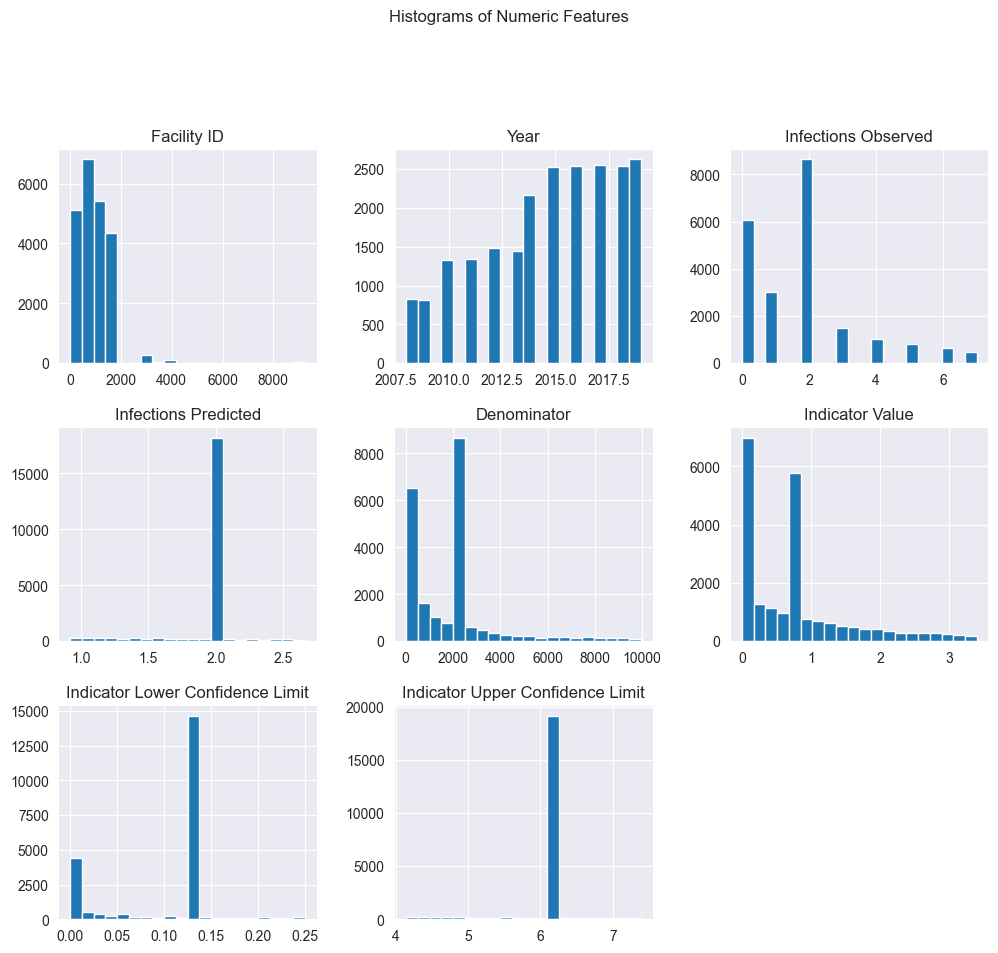

In [26]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.show()

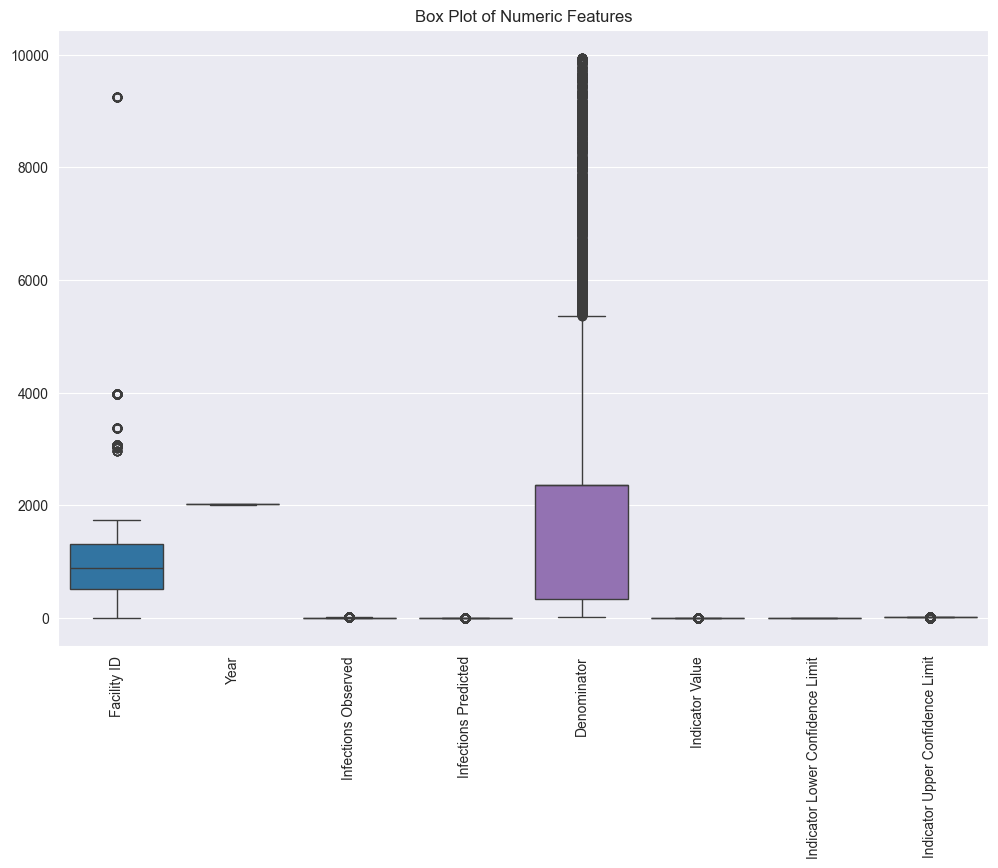

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of Numeric Features')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

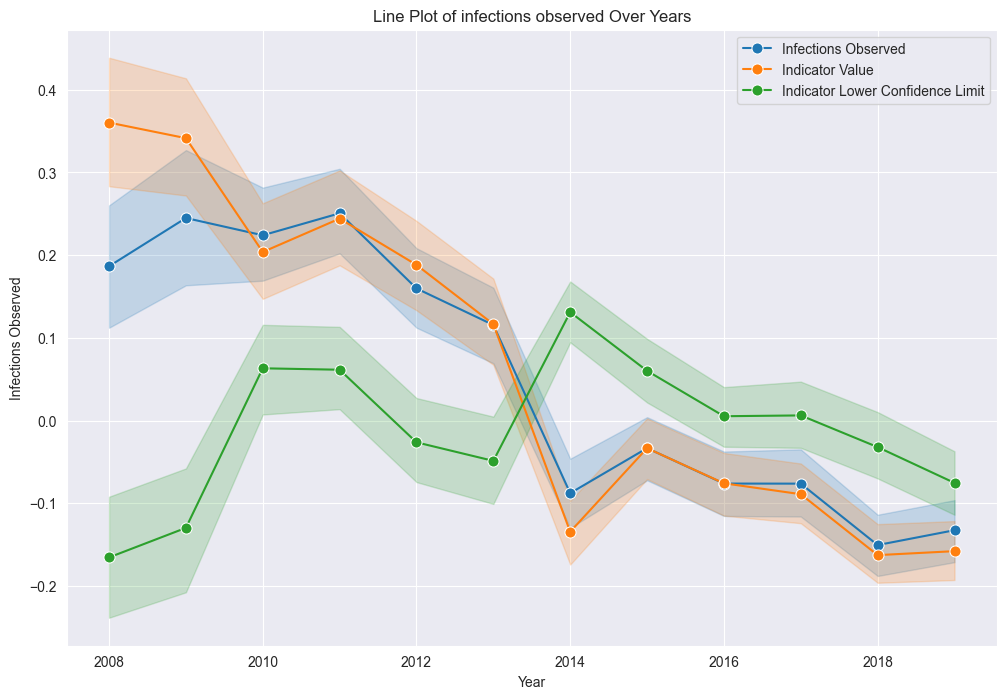

In [46]:
columns_to_plot = ['Infections Observed', 'Indicator Value', 'Indicator Lower Confidence Limit']

plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    sns.lineplot(x='Year', y=column, data=df, label=column, marker='o', linestyle='-', markersize=8)
plt.title('Line Plot of infections observed Over Years')
plt.xlabel('Year')
plt.ylabel('Infections Observed')
plt.show()

In [44]:
numeric_columns = ['Infections Observed', 'Infections Predicted', 'Denominator', 'Indicator Value', 'Indicator Lower Confidence Limit', 'Indicator Upper Confidence Limit']

min_values = df[numeric_columns].min()
max_values = df[numeric_columns].max()

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the normalized DataFrame
print(df.head())

    Facility ID                    Hospital Name         Indicator Name  Year  \
3           581        degraff memorial hospital              ssi colon  2014   
5           158  guthrie cortland medical center              ssi colon  2019   
6           804                 massena hospital              ssi colon  2011   
10         1178        bronxcare hospital center   clabsi pediatric icu  2018   
11         1446  nyu langone orthopedic hospital  clabsi step down unit  2019   

    Infections Observed  Infections Predicted  Denominator  Indicator Value  \
3              0.115163              0.253956     0.204387        -0.055555   
5              0.115163              0.253956     0.204387        -0.055555   
6              0.115163              0.253956     0.204387        -0.055555   
10             0.115163              0.253956     0.204387        -0.055555   
11             0.115163              0.253956     0.204387        -0.055555   

    Indicator Lower Confidence Limit  

--> Standard Scaling of all the columns having numerical values

In [50]:
X_column = ['Infections Observed', 'Infections Predicted', 'Denominator', 'Indicator Value', 'Indicator Lower Confidence Limit']
Y_column = 'Indicator Upper Confidence Limit'

X = df[X_column]
Y = df[Y_column]

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (17746, 5)
X_val shape: (2219, 5)
X_test shape: (2218, 5)
Y_train shape: (17746,)
Y_val shape: (2219,)
Y_test shape: (2218,)


In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

MSE values of Linear Regression, Random Forest Regression and SVM Regression are [1.103385882790259, 0.2628253006623845, 0.9756993781213277] respectively


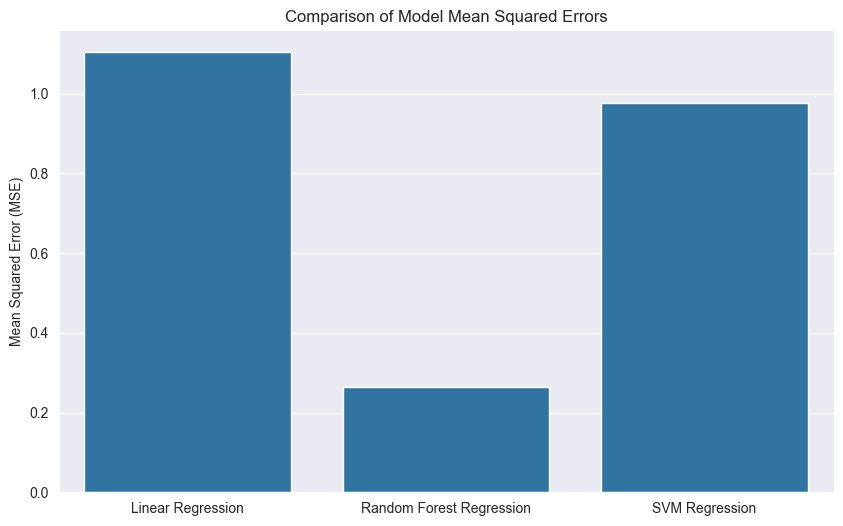

In [73]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(Y_test, linear_pred)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_pred)

# Support Vector Machine (SVM) Regression
svm_model = SVR()
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(Y_test, svm_pred)

models = ['Linear Regression', 'Random Forest Regression', 'SVM Regression']
mse_values = [linear_mse, rf_mse, svm_mse]
print(f'MSE values of Linear Regression, Random Forest Regression and SVM Regression are {mse_values} respectively')

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values)
plt.title('Comparison of Model Mean Squared Errors')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

## Shallow NN

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [82]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
Y_tensor = torch.tensor(Y.values, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(X_tensor, Y_tensor)
batch_size = 64  # Adjust as needed
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [83]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
input_size = len(X_column)
model = NeuralNetwork(input_size)


In [84]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [85]:
num_epochs = 50  # Adjust as needed
losses = []  # To store training losses

for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Save training loss for later plotting
    losses.append(loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')


Epoch [1/50], Loss: 0.946470320224762
Epoch [2/50], Loss: 0.17213265597820282
Epoch [3/50], Loss: 0.8829342722892761
Epoch [4/50], Loss: 0.7158857583999634
Epoch [5/50], Loss: 0.7902558445930481
Epoch [6/50], Loss: 0.8475620746612549
Epoch [7/50], Loss: 1.3229917287826538
Epoch [8/50], Loss: 0.21636752784252167
Epoch [9/50], Loss: 0.5612929463386536
Epoch [10/50], Loss: 1.3702991008758545
Epoch [11/50], Loss: 0.7889038324356079
Epoch [12/50], Loss: 0.4640798270702362
Epoch [13/50], Loss: 0.7681524753570557
Epoch [14/50], Loss: 0.2597663700580597
Epoch [15/50], Loss: 0.2957388758659363
Epoch [16/50], Loss: 1.2735697031021118
Epoch [17/50], Loss: 1.0966378450393677
Epoch [18/50], Loss: 0.30520206689834595
Epoch [19/50], Loss: 0.7678734064102173
Epoch [20/50], Loss: 0.9200559854507446
Epoch [21/50], Loss: 0.6342809796333313
Epoch [22/50], Loss: 0.3996235728263855
Epoch [23/50], Loss: 0.8103642463684082
Epoch [24/50], Loss: 0.98171067237854
Epoch [25/50], Loss: 0.7132329344749451
Epoch [26

In [92]:
save_path = '/Users/eklavyabanwala/Downloads/trained_model.h5'
torch.save(model.state_dict(), save_path)

In [87]:
with torch.no_grad():
    model.eval()
    predictions = model(X_tensor)

# Calculate MSE
mse = nn.MSELoss()(predictions, Y_tensor).item()
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.5685771107673645


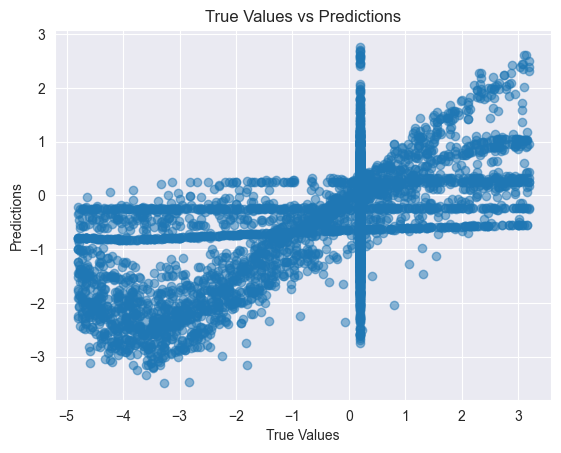

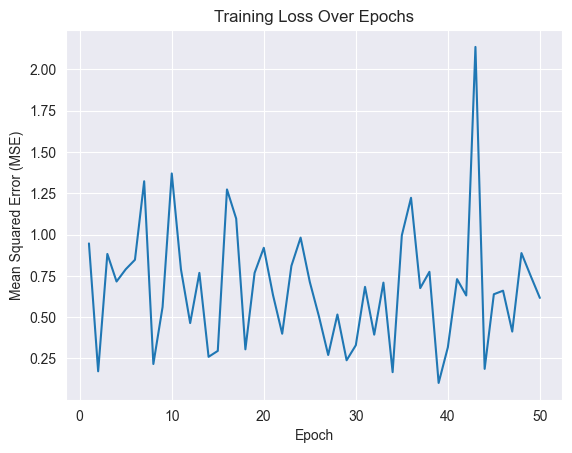

In [88]:
# Visualize predictions vs true values
plt.scatter(Y_tensor.numpy(), predictions.numpy(), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Plot the training loss over epochs
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss Over Epochs')
plt.show()